****

## Loan Approval Classification

- The purpose of this project is to classify loan status (approved or rejected).
- The following dataset collected from Kaggle is used: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data
- The dataset contains 45,000 records and 14 variables

The code is available on: https://github.com/Saladin21/loan-approval-classification

In [29]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### EDA

In [4]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [5]:
df.select_dtypes(include=['float64', 'int64']).describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [6]:
df.select_dtypes(include=['float64', 'int64']).corr()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


In [7]:
def makePlot(col):
    counts = df[col].value_counts()
    
    ax = counts.plot(kind='bar', color='skyblue', figsize=(12, 5))
    for i, v in enumerate(counts):
        ax.text(i, v + 0.1, str(v), ha='center', fontsize=12)

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} Counts')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

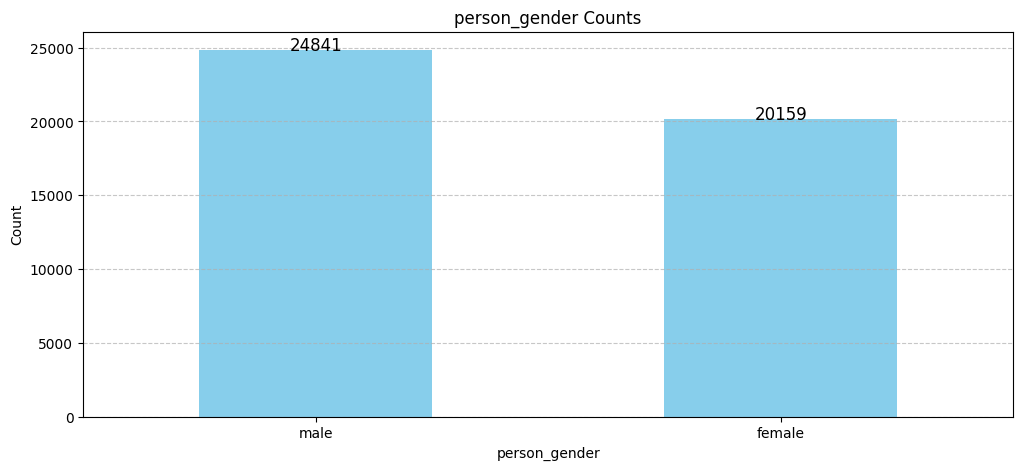

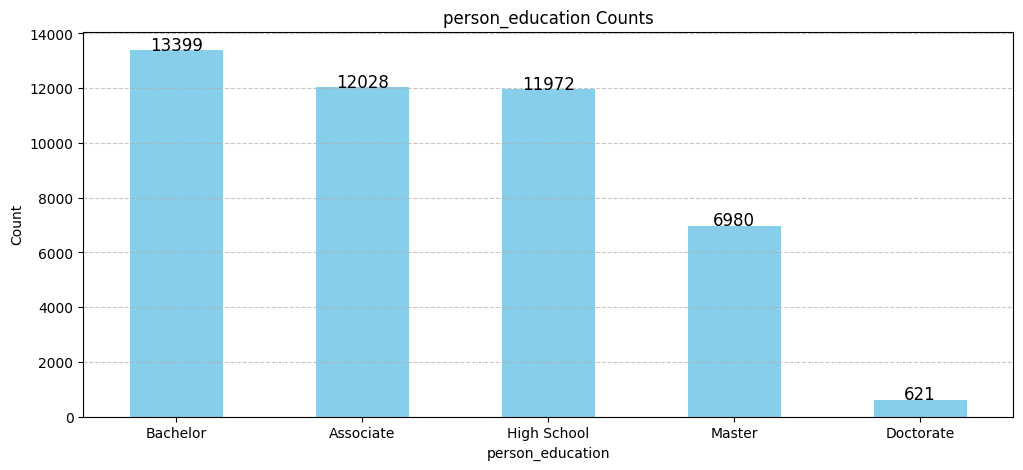

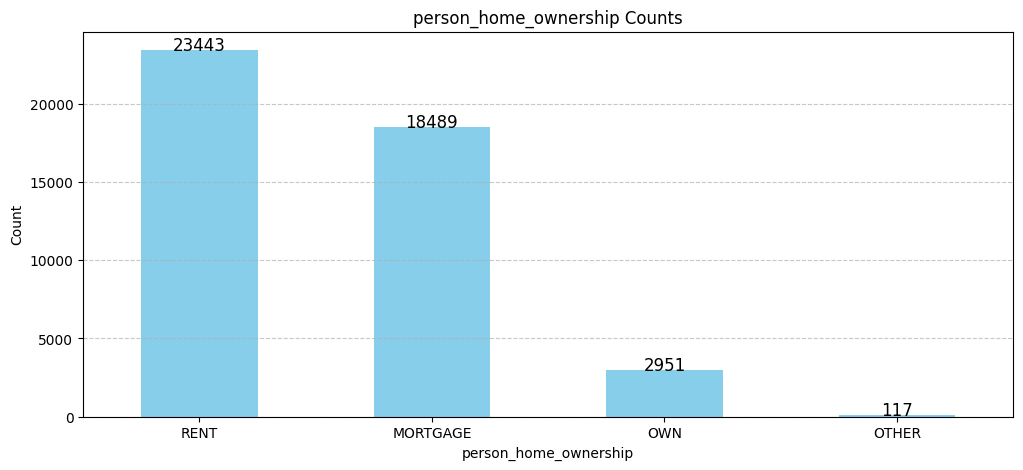

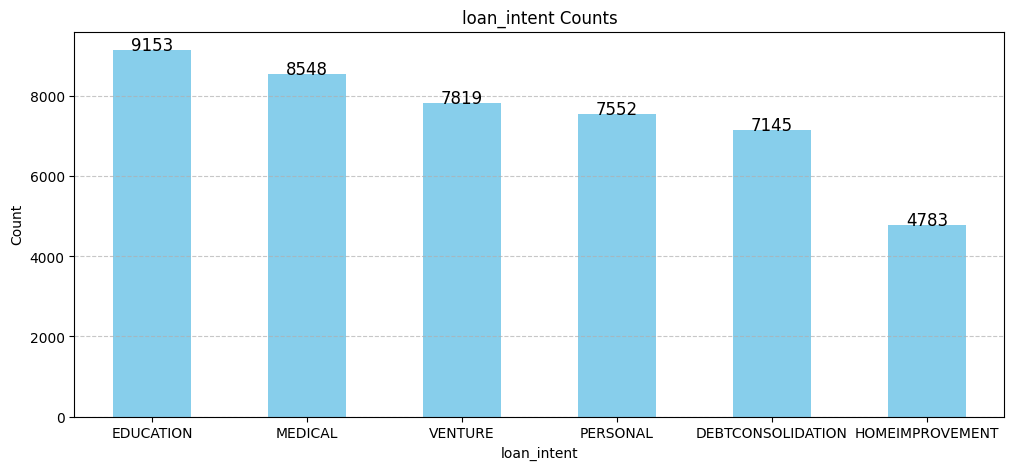

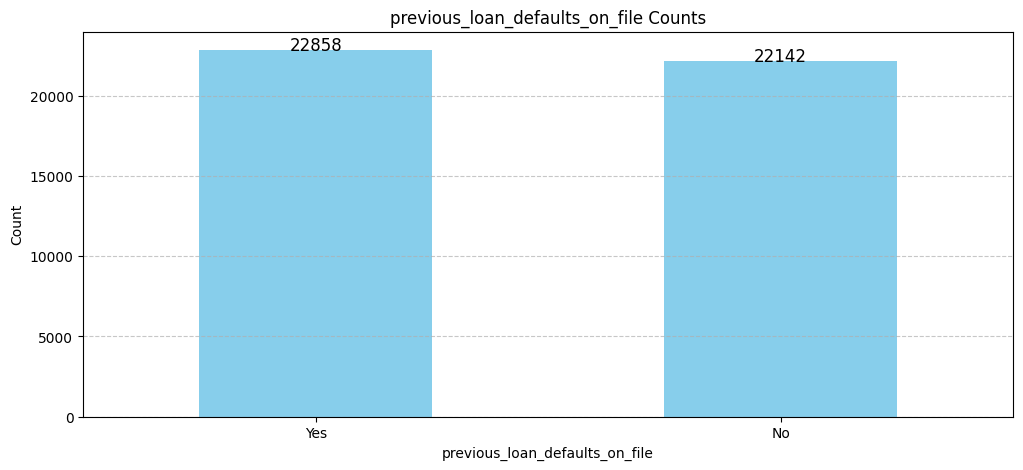

In [8]:
for col in df.select_dtypes(include=['object']).columns:
    makePlot(col)

### Analysis

### Encoding of Non-Numeric data
Non-numeric data will be encoded with pandas categorical or OneHotEncoder. categorical will be used for data that have inherent order. Here are the list of data and type of encoder.
* person_gender : OneHotEncoder
* person_education : categorical
* person_home_ownership : OneHotEncoder
* loan_intent : OneHotEncoder
* previous_loan_defaults_on_file : categorical

In [9]:
onehot = ["person_gender", "person_home_ownership", "loan_intent"]
for o in onehot:
    encoder = OneHotEncoder(sparse_output=False)
    encoded = encoder.fit_transform(df[[o]])
    temp = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([o]))
    df = df.join(temp)
    df = df.drop(columns=o)
df['person_education'] = pd.Categorical(df['person_education'], categories=["High School", "Associate", "Bachelor", "Master", "Doctorate"], ordered=True).codes
df['previous_loan_defaults_on_file'] = pd.Categorical(df['previous_loan_defaults_on_file'], categories=["Yes", "No"], ordered=True).codes


In [10]:
df.describe()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
count,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,...,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,1.383333,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.492044,...,0.410867,0.002600,0.065578,0.520956,0.158778,0.203400,0.106289,0.189956,0.167822,0.173756
std,6.045108,1.077741,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.499942,...,0.491997,0.050924,0.247545,0.499566,0.365473,0.402532,0.308210,0.392270,0.373712,0.378903
min,20.000000,0.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,1.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,2.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,144.000000,4.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Train-Test Data Split

In [11]:
X = df.drop(columns="loan_status")
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Scaling
Some methods such as Logistic Regression or SVM might benefit from having scaled data

In [13]:
model_probs = {}

In [14]:
def plotROC(y_train, y_probs):
    fpr, tpr, _ = roc_curve(y_train, y_probs)
    roc_auc = auc(fpr, tpr)
    
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

#### Logistic Regression

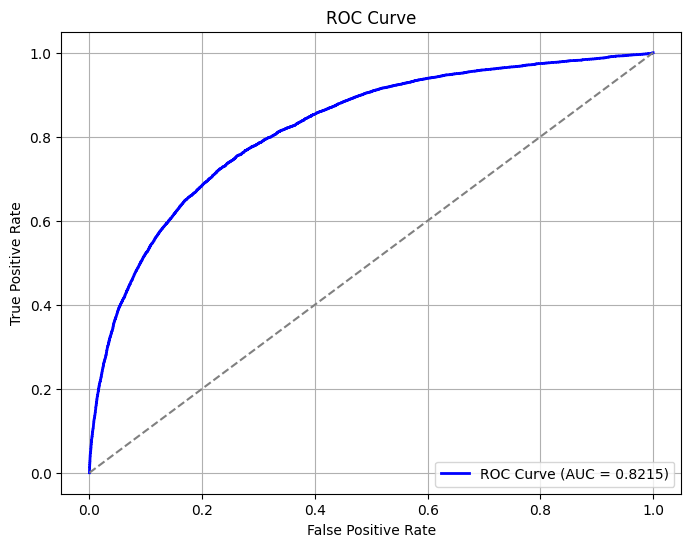

In [15]:
logreg = LogisticRegression(max_iter=500)
y_probs = cross_val_predict(logreg, X_train, y_train, cv=5, method="predict_proba")[:, 1]

plotROC(y_train, y_probs)
model_probs['Logistic Regression'] = y_probs

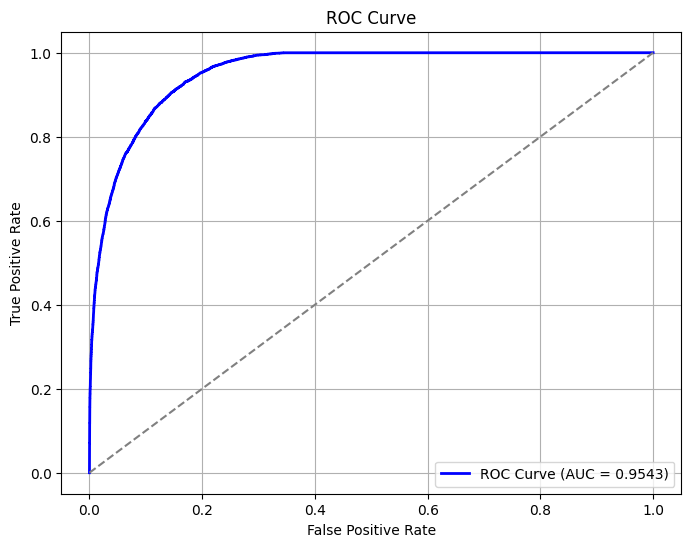

In [16]:
logreg = LogisticRegression(max_iter=500)
y_probs = cross_val_predict(logreg, X_train_scaled, y_train, cv=5, method="predict_proba")[:, 1]

plotROC(y_train, y_probs)
model_probs['Logistic Regression Scaled'] = y_probs

#### Decision Tree

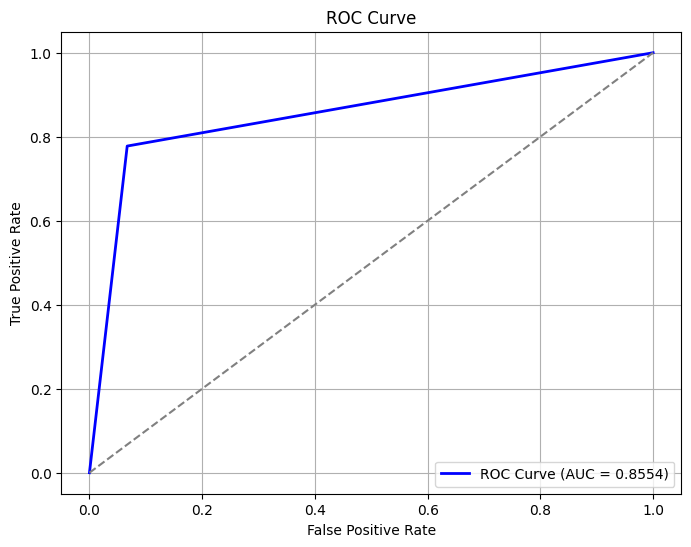

In [17]:
dt = DecisionTreeClassifier(random_state=42)

y_probs = cross_val_predict(dt, X_train, y_train, cv=5, method="predict_proba")[:, 1]

plotROC(y_train, y_probs)
model_probs['Decision Tree'] = y_probs

#### Random Forest

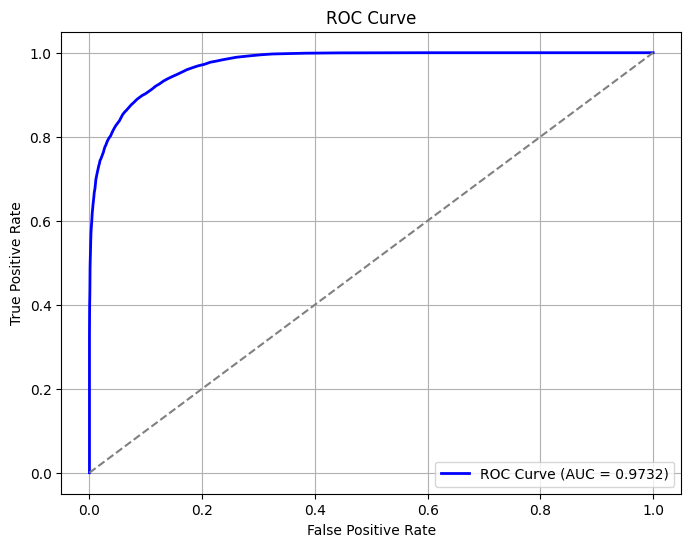

In [18]:
rf = RandomForestClassifier(random_state=42)

y_probs = cross_val_predict(rf, X_train, y_train, cv=5, method="predict_proba")[:, 1]

plotROC(y_train, y_probs)
model_probs['Random Forest'] = y_probs

### AdaBoost

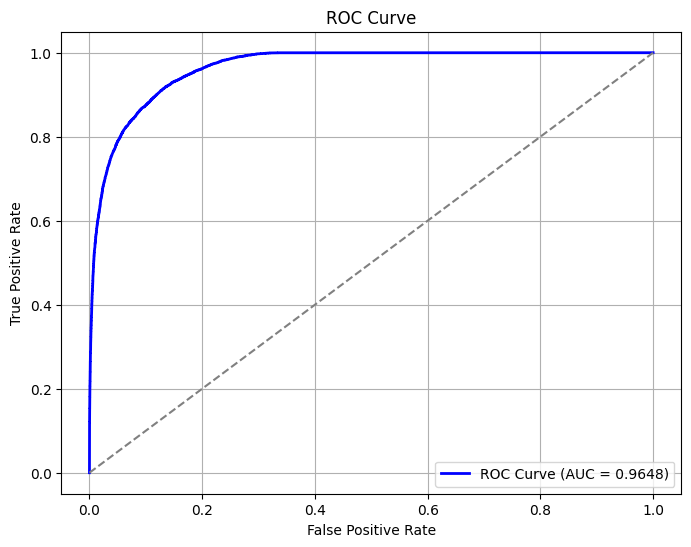

In [19]:
base_estimator = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)

y_probs = cross_val_predict(ada, X_train, y_train, cv=5, method="predict_proba")[:, 1]

plotROC(y_train, y_probs)
model_probs['Adaboost'] = y_probs

### XGBoost

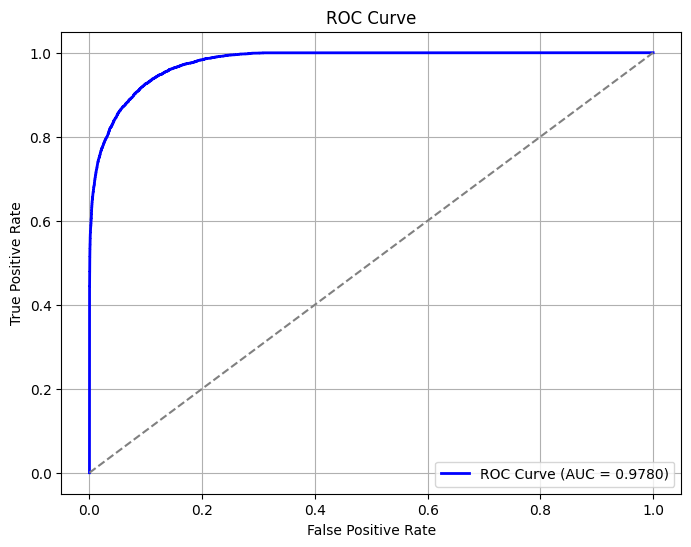

In [20]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

y_probs = cross_val_predict(xgb, X_train, y_train, cv=5, method="predict_proba")[:, 1]

plotROC(y_train, y_probs)
model_probs['XGBoost'] = y_probs

### Results

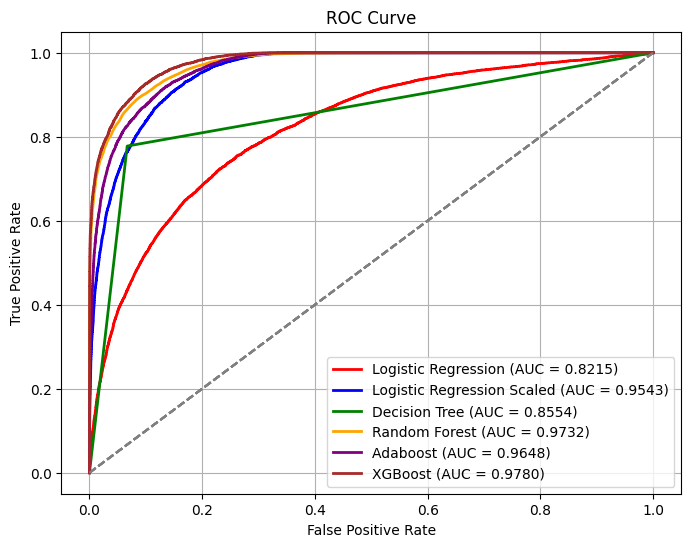

In [23]:
color_list = [
    "red", "blue", "green", "orange", "purple", "brown", "pink", 
    "gray", "olive", "cyan", "magenta", "lime", "teal", "gold"
]
i=0
plt.figure(figsize=(8, 6))
for k, pr in model_probs.items():
    fpr, tpr, _ = roc_curve(y_train, pr)
    roc_auc = auc(fpr, tpr)    
    plt.plot(fpr, tpr, color=color_list[i], lw=2, label=f'{k} (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    i+=1
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#### Grid Search
Based on the plot above, the model with the best AUC is XGBoost, below a Gridsearch is performed to further finetune the performance of the model

In [35]:
param_grid = {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2], 
        "max_depth": [3, 5, 7], 
        "min_child_weight": [1, 3, 5],
        "gamma": [0, 0.1, 0.2],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0],
    }
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)
model = grid_search.best_estimator_

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
Best AUC Score: 0.9790287351409012


### Conclusion

Here is the result of evaluating the best model on the test data

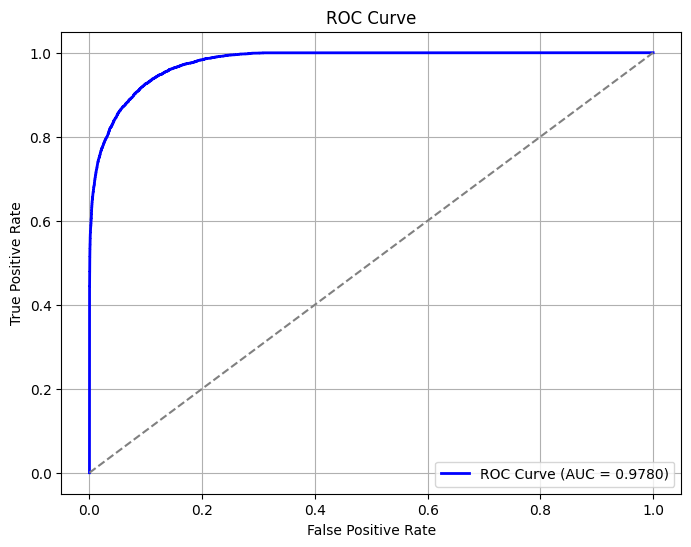

In [ ]:
y_pred = model.predict(X_test)
y_pobs = model.predict_proba(X_test)
plotROC(y_train, y_probs)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7045
           1       0.89      0.81      0.85      1955

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.94      0.94      0.94      9000



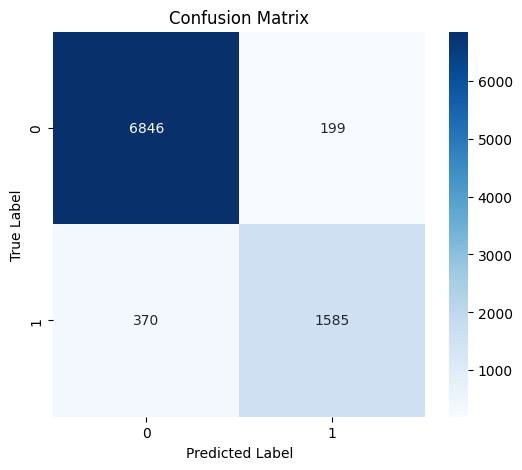

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(set(y))), yticklabels=range(len(set(y))))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The AUC score is 0.97 which is similar with the AUC from the training set suggesting no overfitting. From the confusion matrix we can see that it correctly classify most of the data. The accuracy of the prediction is 0.94. Overral this model performs well for the task of classifying Loan approval status, however the f1-score for class 1 is lower than class 0 this might be caused by imbalance in the data where we have higher number of sample with class 1. Further improvement for the model migh be done with sampling methods to address this issue. 